In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy(y_true, y_pred):
    return - (y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 10000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

for epoch in range(epochs):
    for i in range(len(X)):
        x_i = X[i].reshape(1, -1)
        y_i = y[i].reshape(1, -1)

        # Forward pass
        z1 = np.dot(x_i, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        loss = binary_cross_entropy(y_i, a2)

        d_a2 = a2 - y_i
        d_W2 = np.dot(a1.T, d_a2)
        d_b2 = d_a2

        d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(z1)
        d_W1 = np.dot(x_i.T, d_a1)
        d_b1 = d_a1

        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss[0][0]:.4f}")

print("\nFinal Outputs:")
for i in range(len(X)):
    z1 = np.dot(X[i], W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    print(f"Input: {X[i]} → Predicted: {a2[0][0]:.4f} (Expected: {y[i][0]})")


Epoch 0, Loss: 0.5934
Epoch 1000, Loss: 0.6965
Epoch 2000, Loss: 0.0915
Epoch 3000, Loss: 0.0173
Epoch 4000, Loss: 0.0093
Epoch 5000, Loss: 0.0063
Epoch 6000, Loss: 0.0048
Epoch 7000, Loss: 0.0038
Epoch 8000, Loss: 0.0032
Epoch 9000, Loss: 0.0028

Final Outputs:
Input: [0 0] → Predicted: 0.0028 (Expected: 0)
Input: [0 1] → Predicted: 0.9974 (Expected: 1)
Input: [1 0] → Predicted: 0.9962 (Expected: 1)
Input: [1 1] → Predicted: 0.0024 (Expected: 0)


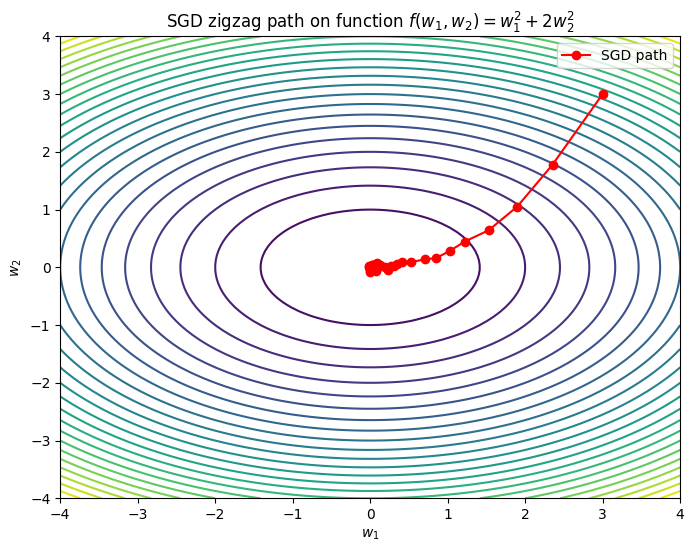

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(w):
    return w[0]**2 + 2 * w[1]**2

def grad_f_stochastic(w, noise_scale=0.3):
    # True gradient
    grad = np.array([2*w[0], 4*w[1]])
    # Add noise to simulate stochasticity (like using one data point)
    noise = np.random.randn(2) * noise_scale
    return grad + noise

w = np.array([3.0, 3.0])
lr = 0.1
iterations = 50

trajectory = [w.copy()]

for _ in range(iterations):
    grad = grad_f_stochastic(w)
    w = w - lr * grad
    trajectory.append(w.copy())

trajectory = np.array(trajectory)

w1 = np.linspace(-4, 4, 100)
w2 = np.linspace(-4, 4, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = W1**2 + 2*W2**2

plt.figure(figsize=(8,6))
plt.contour(W1, W2, Z, levels=30, cmap='viridis')
plt.plot(trajectory[:,0], trajectory[:,1], marker='o', color='red', label='SGD path')
plt.title("SGD zigzag path on function $f(w_1, w_2) = w_1^2 + 2w_2^2$")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.legend()
plt.show()
